In [2]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   -- ------------------------------------- 19.4/332.0 MB 97.1 MB/s eta 0:00:04
   --- ------------------------------------ 32.2/332.0 MB 78.2 MB/s eta 0:00:04
   ------ --------------------------------- 50.6/332.0 MB 81.3 MB/s eta 0:00:04
   -------- ------------------------------- 69.2/332.0 MB 83.2 MB/s eta 0:00:04
   ---------- ----------------------------- 87.0/332.0 MB 85.9 MB/s eta 0:00:03
   ----------- ---------------------------- 95.4/332.0 MB 75.9 MB/s eta 0:00:04
   ----------- ---------------------------- 96.7/332.0 MB 70.3 MB/s eta 0:00:04
   ------------ -------------------------- 108.5/332.0 MB 64.7 MB/s eta 0:00:04
   --------------- ----------------------- 128.7/332.0 MB 68.1 MB/s eta 0:00:03
   ----------------- --------------------- 149.4/332.0 MB 71.2 MB/s eta 0:00:03
   ------------------- ------------------- 170.1/332.0 MB 73.6 MB/s eta 0:00:03
   --------------------- ----------------- 186.9/

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
import pandas as pd

In [57]:
train_card_dir = './Image_data/cardboard'
train_glass_dir = './Image_data/glass'
train_metal_dir = './Image_data/metal'
train_paper_dir = './Image_data/paper'
train_plast_dir = './Image_data/plastic'
train_trash_dir = './Image_data/trash'

In [58]:
train_card_names = os.listdir(train_card_dir)
train_glass_names = os.listdir(train_glass_dir)
train_metal_names = os.listdir(train_metal_dir)
train_paper_names = os.listdir(train_paper_dir)
train_plast_names = os.listdir(train_plast_dir)
train_trash_names = os.listdir(train_trash_dir)

In [59]:
card_files = [train_card_dir + '/' + f for f in train_card_names]
glass_files = [train_glass_dir + '/' + f for f in train_glass_names]
metal_files = [train_metal_dir + '/' + f for f in train_metal_names]
paper_files = [train_paper_dir + '/' + f for f in train_paper_names]
plast_files = [train_plast_dir + '/' + f for f in train_plast_names]
trash_files = [train_trash_dir + '/' + f for f in train_trash_names]

In [60]:
card_files

['./Image_data/cardboard/cardboard1.jpg',
 './Image_data/cardboard/cardboard10.jpg',
 './Image_data/cardboard/cardboard100.jpg',
 './Image_data/cardboard/cardboard101.jpg',
 './Image_data/cardboard/cardboard102.jpg',
 './Image_data/cardboard/cardboard103.jpg',
 './Image_data/cardboard/cardboard104.jpg',
 './Image_data/cardboard/cardboard105.jpg',
 './Image_data/cardboard/cardboard106.jpg',
 './Image_data/cardboard/cardboard107.jpg',
 './Image_data/cardboard/cardboard108.jpg',
 './Image_data/cardboard/cardboard109.jpg',
 './Image_data/cardboard/cardboard11.jpg',
 './Image_data/cardboard/cardboard110.jpg',
 './Image_data/cardboard/cardboard111.jpg',
 './Image_data/cardboard/cardboard112.jpg',
 './Image_data/cardboard/cardboard113.jpg',
 './Image_data/cardboard/cardboard114.jpg',
 './Image_data/cardboard/cardboard115.jpg',
 './Image_data/cardboard/cardboard116.jpg',
 './Image_data/cardboard/cardboard117.jpg',
 './Image_data/cardboard/cardboard118.jpg',
 './Image_data/cardboard/cardboard11

In [61]:
print('cardboard:', len(train_card_names))
print('glass:', len(train_glass_names))
print('metal:', len(train_metal_names))
print('paper:', len(train_paper_names))
print('plastic:', len(train_plast_names))
print('trash:', len(train_trash_names))

cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482
trash: 137


In [62]:
# 모델 설계하기
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(512,384,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(6, activation='sigmoid'))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)                   │ (None, 510, 382, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 255, 191, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 253, 189, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 126, 94, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 124, 92, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 62, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 62, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 182528)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │       1,095,174 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,118,758 (4.27 MB)

 Trainable params: 1,118,758 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [64]:
# 이미지 값을 0~1 사이로 제한
train_datagen = ImageDataGenerator(
        rescale=1/255,
        validation_split=0.2
)

In [65]:
# Train set
train_generator = train_datagen.flow_from_directory(
    './Image_data/',
    target_size=(512,384), # 해상도 조절
    batch_size=128, # 배치 크기
    class_mode='categorical', #분류 방법
    subset='training'
)

Found 2024 images belonging to 6 classes.


In [66]:
train_generator

In [67]:
# valid set
valid_generator = train_datagen.flow_from_directory(
    './Image_data/',
    target_size=(512,384),
    batch_size=128,
    class_mode='categorical',
    subset='validation'
)

Found 503 images belonging to 6 classes.


In [68]:
# 모델 학습
history = model.fit(
    train_generator,
    epochs=15,
    verbose=1
)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.2470 - loss: 0.5710 
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.3785 - loss: 0.4052
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5020 - loss: 0.3555
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.5326 - loss: 0.3311
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.5860 - loss: 0.3118   
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6038 - loss: 0.2947
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6601 - loss: 0.2699
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6882 - loss: 0.2516
Epoch 9/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7144 - loss: 0.2380
Epoch 10/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.7554 - loss: 0.2160   
Epoch 11/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.7712 - loss: 0.2013
Epoch 12/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.80

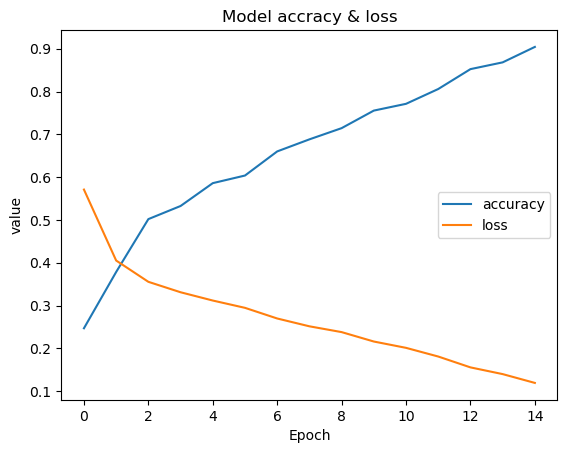

In [70]:
# 모델 평가
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accracy & loss')
plt.xlabel('Epoch')
plt.ylabel('value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [71]:
# 모델 검증
results = model.evaluate(valid_generator)
print("test loss, test acc:", results)

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5308 - loss: 0.4381
test loss, test acc: [0.43808355927467346, 0.5308151245117188]


In [75]:
dlist = './Image_data_test/'

In [76]:
predict_list = os.listdir(dlist)

In [77]:
print(predict_list)

['plastic.jpg']
